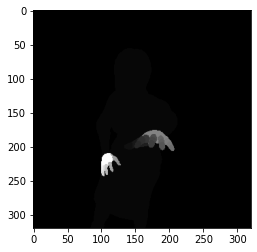

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline  

# reads image 'opencv-logo.png' as grayscale
img = cv2.imread('/content/00000.png', 0) 
plt.imshow(img, cmap='gray')

In [ ]:
segmentation_values = [17] #left palm=17, right palm =33


In [ ]:
def find_min(img, seg_value):
  rows,cols = img.shape
  xmin=-1
  ymin=-1
  for i in range(rows):
      for j in range(cols):
         if img[i,j]==seg_value:
           ymin=i
           for k in range(j):
             for l in range(ymin,rows):
               if img[l,k]==seg_value:
                 xmin=k
                 return ymin, xmin 
  return ymin, xmin

def find_max(img, seg_value):
  rows,cols = img.shape
  xmax=-1
  ymax=-1
  for i in range(rows-1,0,-1):
      for j in range(cols-1,0,-1):
         if img[i,j]==seg_value:
           ymax=i
           for k in range(cols-1,j,-1):
             for l in range(ymax,0,-1):
               if img[l,k]==seg_value:
                 xmax=k
                 return ymax, xmax
  return ymax, xmax

197 176 198 160


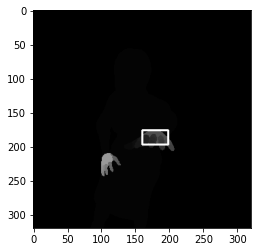

In [ ]:
for value in segmentation_values:
  
  ymax, xmax= find_max(img,value)
  ymin, xmin= find_min(img,value)

  print(ymax, ymin, xmax, xmin)

  if ymax!=-1:

    new_img = img.copy()
    # Draw a diagonal blue line with thickness of 5 px
    cv2.line(new_img,(xmin,ymin),(xmin,ymax),(55,0,0),2)
    cv2.line(new_img,(xmin,ymax),(xmax,ymax),(55,0,0),2)
    cv2.line(new_img,(xmin,ymin),(xmax,ymin),(55,0,0),2)
    cv2.line(new_img,(xmax,ymin),(xmax,ymax),(55,0,0),2)

    plt.imshow(new_img, cmap='gray')



# create xml VOC files

In [ ]:
#import xml.etree.cElementTree as ET
from lxml import etree as ET
from pathlib import Path
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

reference_path= '/content/drive/MyDrive/Validation/color'
input_folder_path = '/content/drive/MyDrive/Validation/mask'
!mkdir /content/drive/MyDrive/Validation/VOC
output_folder_path = '/content/drive/MyDrive/Validation/VOC'

images = [img for img in Path(input_folder_path).glob('*.png')] #images in folder
images_number = len(images)

calc_step =1 #calculation step in images

#iterate through all images in folder
for path in images:
  #reads image as grayscale
  img = cv2.imread(str(path), 0) 
  height, width = img.shape

  #build VOC elementTree
  annotation = ET.Element("annotation")
  ET.SubElement(annotation, "folder").text = Path(reference_path).stem
  ET.SubElement(annotation, "filename").text = Path(path).name
  ET.SubElement(annotation, "path").text = reference_path+'/'+Path(path).name
  source = ET.SubElement(annotation, "source")
  ET.SubElement(source, "database").text = 'Unknown'
  size = ET.SubElement(annotation, "size")
  ET.SubElement(size, "width").text = str(width)
  ET.SubElement(size, "height").text = str(height)
  ET.SubElement(size, "depth").text = '3'
  ET.SubElement(annotation, "segmented").text = '0'


  #segmentation values for left palm=17, right palm=33
  seg_values = [17, 33]
  seg_names = ['left_palm', 'right_palm']
  #array of object elements in tree
  objects = [ET.SubElement(annotation, "object"),ET.SubElement(annotation, "object")]

  #iterate trough seg_values
  for i in range(len(seg_values)):
    #detect coordinates of bounding box
    ymax, xmax= find_max(img,seg_values[i])
    ymin, xmin= find_min(img,seg_values[i])

    if ymax!=-1 and ymin!=-1:
      ET.SubElement(objects[i], "name").text = seg_names[i]
      ET.SubElement(objects[i], "pose").text = 'Unspecified'
      ET.SubElement(objects[i], "truncated").text = '0'
      ET.SubElement(objects[i], "difficult").text = '0'
      bndbox = ET.SubElement(objects[i], "bndbox")
      ET.SubElement(bndbox, "xmin").text = str(xmin)
      ET.SubElement(bndbox, "ymin").text = str(ymin)
      ET.SubElement(bndbox, "xmax").text = str(xmax)
      ET.SubElement(bndbox, "ymax").text = str(ymax)

    else:
      annotation.remove(objects[i])
    
  #print calculation 
  if calc_step%100==0:
    print('Handled '+str(calc_step)+'/'+str(images_number)+' pictures.')
  calc_step += 1 #increase calculation step



  #write xml file to
  tree = ET.ElementTree(annotation)
  tree.write( output_folder_path +'/'+ path.stem+".xml", pretty_print=True)







Handled 100/2728 pictures.
Handled 200/2728 pictures.
Handled 300/2728 pictures.
Handled 400/2728 pictures.
Handled 500/2728 pictures.
Handled 600/2728 pictures.
Handled 700/2728 pictures.
Handled 800/2728 pictures.
Handled 900/2728 pictures.
Handled 1000/2728 pictures.
Handled 1100/2728 pictures.
Handled 1200/2728 pictures.
Handled 1300/2728 pictures.
Handled 1400/2728 pictures.
Handled 1500/2728 pictures.
Handled 1600/2728 pictures.
Handled 1700/2728 pictures.
Handled 1800/2728 pictures.
Handled 1900/2728 pictures.
Handled 2000/2728 pictures.
Handled 2100/2728 pictures.
Handled 2200/2728 pictures.
Handled 2300/2728 pictures.
Handled 2400/2728 pictures.
Handled 2500/2728 pictures.
Handled 2600/2728 pictures.
Handled 2700/2728 pictures.


In [ ]:
while True:pass